# Supervised Learning - Crossvalidation

This colab notebook is an introduction to crossvalidation technique

Suppose you splitted your dataset into train and test sets. After training on train set and testing you got bad results, so you change some hyperparameters and train&test again. You repeat this procedure until you get good enough results. Then, you should delpoy your model into production. After deploying it fails misarably. The reason is that doing the above mentioned procedure oferfitted on test set.<br>
Every time you tune a hyperparameter to get better result on a particular test set, you are including some kind of insight (_information leakage_) about test set into your model. Thus, by repeating the procedure you are effectively starting to overfit on test set.<br>
To avoid the above situation you can split your data into 3 sets train, validation and test. Train on _train set_, then evaluate your model on _validation set_. Don't look at _test set_ until you have got good enough model on validation set. By this procedure you know that you didn't overfit on test set.<br>
To fit model with different parameters effectively you should not use same validation set, thus crossvalidation technique will be useful in this case.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
# Let's make a simulated data
X = np.random.randint(100,size = 100)
Y = 0.0003*X**2+2*np.random.random(size = 100)

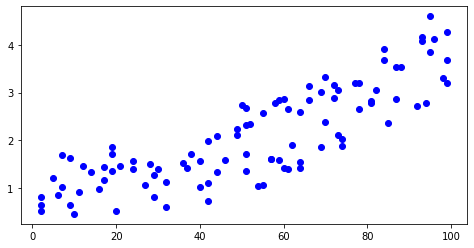

In [12]:
plt.figure(figsize = (8,4))
plt.plot(X,Y,'bo')
plt.show()

### K-fold crossvalidation

The idea of k-fold is to split your dataset into k parts. Using k-1 parts train your model, then test on the 1 part left out. Repeat the procedure for each part.


![title](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

After training you can average the results and and understand how good your model performs with set parameters. You can repeat the proccess for each set of hyperparameters. After all that procedure you take the model which had best average performance and evaluate it on test set. Thus, you would have more realistic result from the test set.

In [0]:
from sklearn.model_selection import KFold

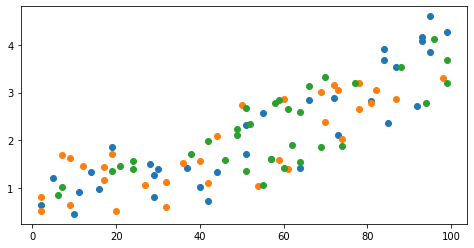

In [14]:
# split data into 3 folds
kf = KFold(n_splits=3, random_state=None, shuffle=False)
plt.figure(figsize = (8,4))
for train_index, test_index in kf.split(X):
    X_val = X[test_index]
    Y_val = Y[test_index]
    plt.plot(X_val,Y_val, marker = 'o', label = 'Test',linestyle = '')
plt.show()

In [15]:
list(kf.split(X))

[(array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
         84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
  array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
     

You can experiment with number of folds in the code below. More folds means that you will build more models. This means that you will need more time to build more models. The varaiance of the estimate also increases with number of folds as number of sample in each validation set decreases. However, the mean of the estimate is less sensitive to dataset. A general rule of thumb is to pick 10 folds.

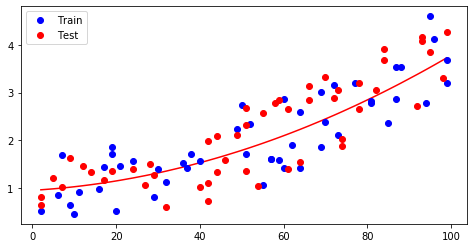

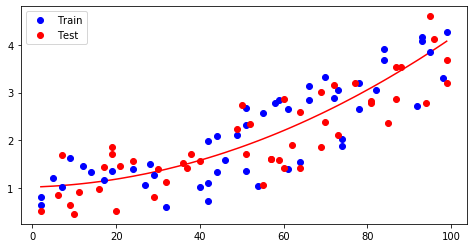

test_error_mean: 0.279854022422085 
 test_error_std: 0.010215031815149017


In [16]:
# split data into multiple folds
kf = KFold(n_splits=2, shuffle=True)
k_fold_test_errors = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Fitting a second degree curve i.e. y = a + bX + bX^2
    poly = np.poly1d(np.polyfit(X_train,Y_train,deg = 2))
    plt.figure(figsize = (8,4))
    plt.plot(sorted(X),poly(sorted(X)),'r')
    plt.plot(X_train,Y_train,'bo', label = 'Train')
    plt.plot(X_test,Y_test,'ro', label = 'Test')
    plt.legend()
    plt.show()
    mse_train = (np.square(poly(X_train) - Y_train)).mean()
    mse_test = (np.square(poly(X_test) - Y_test)).mean()
    k_fold_test_errors.append(mse_test)
    #print('Train error:',mse_train,'\n','Test error:', mse_test)
print('test_error_mean:',np.mean(k_fold_test_errors),'\n','test_error_std:',np.std(k_fold_test_errors))

Leave one out crossvalidation is what it says. You train your model on $n-1$ points and test on $1$ point for all $n$ points.

In [17]:
# LOOCV
kf = KFold(n_splits=len(X), shuffle=True)
k_fold_test_errors = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Fitting a second degree curve i.e. y = a + bX + bX^2
    poly = np.poly1d(np.polyfit(X_train,Y_train,deg = 2))
#     plt.figure(figsize = (16,8))
#     plt.plot(sorted(X),poly(sorted(X)),'r')
#     plt.plot(X_train,Y_train,'bo', label = 'Train')
#     plt.plot(X_test,Y_test,'ro', label = 'Test')
#     plt.legend()
#     plt.show()
    mse_train = (np.square(poly(X_train) - Y_train)).mean()
    mse_test = (np.square(poly(X_test) - Y_test)).mean()
    k_fold_test_errors.append(mse_test)
    #print('Train error:',mse_train,'\n','Test error:', mse_test)
print('test_error_mean:',np.mean(k_fold_test_errors),'\n','test_error_std:',np.std(k_fold_test_errors))

test_error_mean: 0.27774363661631807 
 test_error_std: 0.2569828919530466


So, LOOCV has higher variance but lower estimate bias than K-fold CV. Always consider the size of the dataset. If size is small LOOCV is better as you won't have time problems and you will have the most data for training. In case of big dataset time might become an issue and you should pick K-fold CV.

Hyperparameter optimization is usually done with GridSearch or RandomSearch:<br>
**study them in your homework**


![alt text](https://miro.medium.com/max/1004/0*yDmmJmvRowl0cSN8.png)


Another layer of testing is to add nested cross validation, which means that you keep multiple instances of "test" set. Nested crossvalidation is used to test the fitting proccess stability of the model. In the inner loop you try to find model with best hyperparameters and test the performance on test fold in outer loop. Thus you have as many "best" models as folds you have in the outer loop. If model hyperparameters are vastly different from each other, then fitting procedure is unstable. Thus, a more regularized model might be better to use for that case.

![title](https://sebastianraschka.com/images/faq/evaluate-a-model/nested-k-fold.png)

### kaggle's article about data leakage
https://www.kaggle.com/alfazick/data-leakage